# UE 803: Data Science
Project: Clustering and Classifying People based on Text and
KB information

About this project
In this project, you will collect information about a people belonging to different categories (such as artists, politician, sportspeople, etc.). Based on this information, you will then try to automatically cluster and classify these people into the correct categories.
We will use two sources of information, namely:

• The Wikipedia online encyclopedia1

• The Wikidata knowledge base2

Deadline

The deadline for submission is May 15th, 2021. This is a strict deadline. Late submissions will be penalised (-0.20 points per day past the deadline).

# Exercise 1 – Corpus extraction (10 points)

The goal of this exercise is to compile a text corpus from the Wikipedia online encyclopedia. This corpus will be made of plain text sentences, selected so as to have a roughly balanced corpus in terms of train-
ing data (each target category should be associated with the same number of sentences). We will focus on the 6 following categories: architects, mathematicians, painters, politicians, singers and writers.
    
Concretely, you are required to implement a Python program which takes as a an input:

• a number k of persons per category,

• a number n of sentences per person (persons whose wikipedia description is too short to have n sentences, should be ignored).

This extraction task can be realised through the following steps:
    
1.(lecture 6) Create a list of persons you want to work with. Those persons should fall into two main types: artists (A) and non artists (Z). Singers, writers and painters are of type A while architects, politi- cians and mathematicians of type Z. For each category, select 30 persons of that category. So in total you should have a list of 180 persons (half of them are artists and half of them are not).

    You can use the wikidata warehouse to find persons of the ex- pected categories. More precisely, the Wikidata collection can be filtered out using the SPARQL language and the following end- point: https://query.wikidata.org/.

    You can thus use the SPARQLwrapper python library to apply a SPARQL query to the Wikidata warehouse and retrieve the re- quired item identifiers.

- Mapping the occupation to ID

This Part is Useless, I just map the ID to occupation. Not affect other block code.

In [3]:

# architects (Q42973)
# mathematician (Q170790)
# painter (Q1028181)
# politician (Q82955)
# singer (Q177220)
# writer (Q36180)


Extract all the data (180 persons and 30 in each categories)


Here is the concept that I extract the data:

SELECT person and personLabel WHERE

{
    
    TYPE A
    
    UNION 
    
    TYPE Z
}

If we go into detail, I extract 30 persons from each categories, so each type = $30 * 3$ (becuase 3 categories in each type). Total = $(30*3)*2$(2 refers types) = 180 persons

The concept of whole script:

SELECT person and personLabel WHERE

{
    
    {
        SELECT person and personLabel WHERE
        {
            {singers}
            
            UNION 
            
            {writers}
            
            UNION 
            
            {painters}
        }
    }
    
    UNION 
    
    {
        SELECT person and personLabel WHERE
        {
            {architects}
            
            UNION 
            
            {mathematicians}
            
            UNION 
            
            {politicians}
        }
    }
}

In [48]:
#-----Run This
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/
#------extract 180 data, I queried all in one
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?person ?personLabel WHERE
{
# type A
  {
    SELECT ?person ?personLabel WHERE
    {
         #singers
        {SELECT ?person ?personLabel
        WHERE
        {
        # ?person  occupation 'singers'
        ?person wdt:P106 wd:Q177220.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        limit 60
    }
    
    UNION
    
    {
        #writers
        SELECT ?person ?personLabel
        WHERE
        {
        # ?person  occupation writers
        ?person wdt:P106 wd:Q36180.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        limit 60
    }
  
    UNION
  
    {
        #painters
        SELECT ?person ?personLabel
        WHERE
        {
        #?person  occupation painters
        ?person wdt:P106 wd:Q1028181.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
         }
        limit 60
        }
    }
  }
  UNION 
  
# type Z
  {
    SELECT ?person ?personLabel WHERE
    {
         #architects
        {SELECT ?person ?personLabel
        WHERE
        {
        # ?person  occupation 'architects'
        ?person wdt:P106 wd:Q42973.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        limit 60
    }
    
    UNION
    
    {
        #mathematicians
        SELECT ?person ?personLabel
        WHERE
        {
        # ?person  occupation mathematicians
        ?person wdt:P106 wd:Q170790.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        limit 60
    }
  
    UNION
  
    {
        #politicians
        SELECT ?person ?personLabel
        WHERE
        {
        #?person  occupation politicians
        ?person wdt:P106 wd:Q82955.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
         }
        limit 60
        }
    }
  }
  
}


"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()



results = get_results(endpoint_url, query)
# lis = []
for result in results["results"]["bindings"]:
    print(result)
#     lis.extend(result)
# len(lis)/2

{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q5383'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'David Bowie'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q5170'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Blondel de Nesle'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q5105'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Céline Dion'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q5104'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Miranda Cosgrove'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q4826'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Rosa Valetti'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q4636'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Barbra Streisand'}}
{'person': {'type': 'uri', 'value': 'http://www.wikida

In [49]:
#-----Run This
# -----get the links of each persons i.e: 'http://www.wikidata.org/entity/Q2680'
list_of_wikibases = []
for result in results["results"]["bindings"]:
    list_of_wikibases.append(result['person']['value'])
    
len(list_of_wikibases)
# list_of_wikibases

360

In [50]:
#-----Run This
#-----get only the wikibase for search
import re


wikibase_list = []

for l in list_of_wikibases:
    x = re.findall("[^http://www.wikidata.org/entity/].*", l) # get the id after "http://www.wikidata.org/entity/"
    wikibase_list.extend(x)
#     print(x)
len(wikibase_list)
# wikibase_list

360

2.(lecture 3) for each selected person, retrieve his.her Wikidata description and Wikipedia page title. This can be done using the wikidata API along with the wptools python library.

In [92]:

# #test error API i.e: 'Q1503'
# import wptools
# lis_test = ['Q2680',
#             'Q1503',
#             'Q2643', 
#             'Q2632']
# for l in lis_test:
#     try:
#         page = wptools.page(wikibase=l)
#         page.get_wikidata()
#         page.data['description']
#     except LookupError  as le:
#         pass

In [51]:
#-----Run This

import wptools
# lis_test = ['Q2680',
#             'Q2643', 
#             'Q2632']
# for wikibase in list_of_wikibases:
# wikibase= 'Q1803'

page_descriptions = []
add_descriptions_list = []
page_titles= []
add_titles_list = []
for wikibase in wikibase_list:
    try: 
        page = wptools.page(wikibase=wikibase)
        page.get_wikidata()
        #-----collect list of descriptions
        page_descriptions.append(page.data['description'])
        page_descriptions_copy = page_descriptions.copy()
        add_descriptions_list.append(page_descriptions_copy)
        page_descriptions[100:]

        #-----collect list of titles
    #     page.data['title']
        page_titles.append(page.data['title']) # add one title name to page_titles list
        page_titles_copy = page_titles.copy() # copy the page_titles list
        add_titles_list.append(page_titles_copy) # add selected title to another list called add_titles_list 
        page_titles[100:] # truncate all the data in page_titles list
    
    except LookupError  as le:
        pass



www.wikidata.org (wikidata) Q5383
www.wikidata.org (labels) Q33999|P1971|P4782|P40|P166|Q213322|Q98...
www.wikidata.org (labels) P4359|P6002|P937|P1711|Q9798|P26|P4342|...
www.wikidata.org (labels) P2722|P4839|Q97285685|P7818|P6058|Q7901...
www.wikidata.org (labels) Q179191|P3056|P3630|P3987|P4663|Q179586...
www.wikidata.org (labels) P358|P136|Q67311526|P269|Q10800557|P881...
www.wikidata.org (labels) P3845|P3478|P1902|P227|P6578|P1417|Q278...
www.wikidata.org (labels) P4666|P1477|P27|P345|P7109|P7201|P6868|...
www.wikidata.org (labels) P2003|Q187760|P3435|P6327|P1430|P3782
en.wikipedia.org (imageinfo) File:David-Bowie Chicago 2002-08-08 ...
David Bowie (en) data
{
  aliases: <list(6)> David Robert Jones, David Jones, Bowie, Davy ...
  claims: <dict(253)> P31, P19, P26, P214, P227, P269, P244, P268,...
  description: British singer, musician, and actor (1947-2016)
  image: <list(2)> {'file': 'File:David-Bowie Chicago 2002-08-08 p...
  label: David Bowie
  labels: <dict(356)> Q33999, P1

www.wikidata.org (labels) Q33999|Q103618|P5233|P4782|P40|P166|P17...
www.wikidata.org (labels) P213|P8189|P4862|P373|P6844|P3368|Q6794...
www.wikidata.org (labels) Q1144761|P7580|Q47293|Q153120|Q270230|Q...
www.wikidata.org (labels) Q652|P2435|Q16859848|P1411|P5287|P691|P...
www.wikidata.org (labels) Q67311526|P269|Q10800557|P2639|P2019|P3...
www.wikidata.org (labels) P8094|Q13452528|P7865|P2031|P910|Q12048...
www.wikidata.org (labels) P3192|P9463|P1375|P69|P6911|P412|P9305|...
en.wikipedia.org (imageinfo) File:Marlene Dietrich in No Highway ...
Marlene Dietrich (en) data
{
  aliases: <list(2)> Marie Magdalene Dietrich, Dietrich
  claims: <dict(255)> P21, P40, P20, P373, P106, P345, P244, P214,...
  description: German-American actress and singer (1901-1992)
  image: <list(2)> {'file': 'File:Marlene Dietrich in No Highway (...
  label: Marlene Dietrich
  labels: <dict(325)> Q33999, Q103618, P5233, P4782, P40, P166, P1...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, la

www.wikidata.org (labels) P106|Q5|Q11401|P8687|P1412|P21|Q639669|...
en.wikipedia.org (imageinfo) File:Саша1.jpg
T-killah (en) data
{
  aliases: <list(1)> Alexander I. Tarasov
  claims: <dict(27)> P373, P31, P569, P19, P21, P27, P434, P1953, ...
  description: Russian singer and rapper
  image: <list(1)> {'file': 'File:Саша1.jpg', 'kind': 'wikidata-im...
  label: T-killah
  labels: <dict(40)> P106, Q5, Q11401, P8687, P1412, P21, Q639669,...
  modified: <dict(1)> wikidata
  requests: <list(3)> wikidata, labels, imageinfo
  title: T-killah
  what: human
  wikibase: Q4142
  wikidata: <dict(27)> Commons category (P373), instance of (P31),...
  wikidata_pageid: 5062
  wikidata_url: https://www.wikidata.org/wiki/Q4142
}
www.wikidata.org (wikidata) Q4070
www.wikidata.org (labels) P1728|P3430|P106|P1553|P1015|P101|P7859...
www.wikidata.org (labels) Q55960555|Q485176|P3478|Q6408434|P268|P...
en.wikipedia.org (imageinfo) File:Kim Carnes with Mike MacDonald ...
Kim Carnes (en) data
{
  aliases: <

en.wikipedia.org (imageinfo) File:Michael Jackson Dangerous World...
Michael Jackson (en) data
{
  aliases: <list(9)> MJ, The King of Pop, Michael Joe Jackson, Mic...
  claims: <dict(284)> P910, P1151, P26, P25, P22, P106, P358, P373...
  description: American recording artist; singer and songwriter (1...
  image: <list(2)> {'file': 'File:Michael Jackson Dangerous World ...
  label: Michael Jackson
  labels: <dict(418)> Q44855, Q33999, P40, P166, Q333040, Q3972237...
  modified: <dict(1)> wikidata
  requests: <list(11)> wikidata, labels, labels, labels, labels, l...
  title: Michael_Jackson
  what: human
  wikibase: Q2831
  wikidata: <dict(284)> topic's main category (P910), topic's main...
  wikidata_pageid: 3813
  wikidata_url: https://www.wikidata.org/wiki/Q2831
}
www.wikidata.org (wikidata) Q2808
www.wikidata.org (labels) Q5994|P5927|P1015|Q1137694|P1344|P7859|...
www.wikidata.org (labels) P6960|Q18819898|Q8412179|P1728|P3430|Q1...
www.wikidata.org (labels) P136|Q67311526|Q55934795

www.wikidata.org (labels) P1015|P7859|P1741|P2600|Q24068510|P4208...
www.wikidata.org (labels) P4104|P8041|P1207|P244|P5019|P535|P358|...
www.wikidata.org (labels) P1449|Q382616|P9322|P1368|P106|P3417|P2...
en.wikipedia.org (imageinfo) File:Chet Baker (1929–1988).jpg
Chet Baker (en) data
{
  aliases: <list(1)> Chesney Henry "Chet" Baker, Jr.
  claims: <dict(110)> P119, P358, P373, P244, P214, P227, P213, P4...
  description: American jazz trumpeter and vocalist (1929-1988)
  image: <list(1)> {'file': 'File:Chet Baker (1929–1988).jpg', 'ki...
  label: Chet Baker
  labels: <dict(140)> P1015, P7859, P1741, P2600, Q24068510, P4208...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Chet_Baker
  what: human
  wikibase: Q2274
  wikidata: <dict(110)> place of burial (P119), discography (P358)...
  wikidata_pageid: 3214
  wikidata_url: https://www.wikidata.org/wiki/Q2274
}
www.wikidata.org (wikidata) Q1804
www.wikidata.org (labels) Q5994

www.wikidata.org (labels) Q5994|P5068|P1015|Q230127|Q33999|P7859|...
www.wikidata.org (labels) P1412|Q259463|P271|Q36834|P509|P950|P55...
www.wikidata.org (labels) P1303|Q49757|P8309|P103|P101|Q5|Q373910...
www.wikidata.org (labels) P1449|P856|P4638|P1368|P106|P3417|P2510...
www.wikidata.org (labels) Q1415090|P2032|P3065|P3782|Q6581097|Q28...
en.wikipedia.org (imageinfo) File:Serge Gainsbourg par Claude Tru...
Serge Gainsbourg (en) data
{
  aliases: <list(1)> Lucien Ginsburg
  claims: <dict(146)> P40, P119, P20, P19, P373, P214, P213, P27, ...
  description: <str(118)> French singer, songwriter, pianist, film...
  image: <list(1)> {'file': 'File:Serge Gainsbourg par Claude Truo...
  label: Serge Gainsbourg
  labels: <dict(208)> Q5994, P5068, P1015, Q230127, Q33999, P7859,...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Serge_Gainsbourg
  what: human
  wikibase: Q1698
  wikidata: <dict(146)> child (P40), place of burial (P

www.wikidata.org (labels) Q33999|P1971|P4782|P40|P166|P1741|P6698...
www.wikidata.org (labels) Q239177|Q935843|P8591|P373|P3348|P6844|...
www.wikidata.org (labels) P1889|P6394|P4438|Q3282637|P6839|P4927|...
www.wikidata.org (labels) Q546264|P4781|P1670|P1003|P856|P25|Q168...
www.wikidata.org (labels) P8902|P6960|P3980|P8814|P245|P4785|Q164...
www.wikidata.org (labels) P5421|P1695|Q662729|Q7120528|P7029|P127...
www.wikidata.org (labels) P5905|Q145|P3846|P2605|P271|P21|P5534|P...
www.wikidata.org (labels) P2889|Q913897|P1368|P2949|P7929|P361|P7...
en.wikipedia.org (imageinfo) File:John Lennon portrait.jpg
John Lennon (en) data
{
  aliases: <list(4)> John Winston Ono Lennon, John Winston Lennon,...
  claims: <dict(279)> P26, P40, P227, P214, P25, P22, P106, P109, ...
  description: <str(73)> English singer and songwriter, founding m...
  image: <list(1)> {'file': 'File:John Lennon portrait.jpg', 'kind...
  label: John Lennon
  labels: <dict(377)> Q33999, P1971, P4782, P40, P166, P1741, P6

www.wikidata.org (labels) P1649|Q4675038|P1015|P7859|Q741513|P868...
www.wikidata.org (labels) P509|P950|P21|Q718404|Q253612|P2163|P67...
www.wikidata.org (labels) P4527|Q1069127|Q468677|P7763|P7699|Q243...
www.wikidata.org (labels) P2519|P1711|Q6607|P26|Q2322651|P214|P13...
www.wikidata.org (labels) Q1939373|P3106|P7902|Q766|P3478|Q179191...
en.wikipedia.org (imageinfo) File:Bob-Marley.jpg
Bob Marley (en) data
{
  aliases: <list(7)> Donald Marley, Nesta Robert Marley, Tuff Gong...
  claims: <dict(160)> P734, P910, P27, P19, P20, P18, P214, P269, ...
  description: Jamaican singer, songwriter and musician
  image: <list(1)> {'file': 'File:Bob-Marley.jpg', 'kind': 'wikida...
  label: Bob Marley
  labels: <dict(218)> P1649, Q4675038, P1015, P7859, Q741513, P868...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Bob_Marley
  what: human
  wikibase: Q409
  wikidata: <dict(160)> family name (P734), topic's main category ...
  wik

www.wikidata.org (labels) P2977|P509|P21|P950|P2163|Q20056508|P83...
www.wikidata.org (labels) P140|Q234665|P2924|Q7920031|P569|Q51625...
www.wikidata.org (labels) P22|Q231262|Q191039|Q114953|Q1413|Q2362...
en.wikipedia.org (imageinfo) File:Château de Versailles, salon de...
Claudius (en) data
{
  aliases: <list(6)> Tiberius Claudius Drusus Nero Germanicus, Tib...
  claims: <dict(124)> P25, P22, P19, P214, P244, P373, P227, P213,...
  description: Roman emperor (10 BC-AD 54) (r. AD 41–54)
  image: <list(1)> {'file': "File:Château de Versailles, salon de ...
  label: Claudius
  labels: <dict(179)> P989, P7859, P1015, P8179, P40, P2600, Q1747...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Claudius
  what: human
  wikibase: Q1411
  wikidata: <dict(124)> mother (P25), father (P22), place of birth...
  wikidata_pageid: 1836
  wikidata_url: https://www.wikidata.org/wiki/Q1411
}
www.wikidata.org (wikidata) Q1403
www.wikidata.or

en.wikipedia.org (imageinfo) File:Dag Hammarskjöld.jpg
Dag Hammarskjöld (en) data
{
  aliases: <list(1)> Dag Hjalmar Agne Carl Hammarskjöld
  claims: <dict(151)> P214, P244, P213, P434, P373, P227, P106, P2...
  description: Swedish diplomat, economist, and author (1905-1961)
  image: <list(1)> {'file': 'File:Dag Hammarskjöld.jpg', 'kind': '...
  label: Dag Hammarskjöld
  labels: <dict(195)> P1015, P7859, P1741, P166, P2600, Q34, P6907...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Dag_Hammarskjöld
  what: human
  wikibase: Q1267
  wikidata: <dict(150)> VIAF ID (P214), Library of Congress author...
  wikidata_pageid: 1642
  wikidata_url: https://www.wikidata.org/wiki/Q1267
}
www.wikidata.org (wikidata) Q1264
www.wikidata.org (labels) P7859|P1741|P166|P2600|Q121998|P5143|P7...
www.wikidata.org (labels) P345|Q27028|Q35637|P1006|Q5|Q3739104|P1...
www.wikidata.org (labels) P1343|Q55329176|P1284|P1559|P1417|Q1142...
en.wikipe

Narendra Modi (en) data
{
  aliases: <list(6)> Namo, Modi, Narendra Bhai, Narendra Damodarda...
  claims: <dict(117)> P443, P102, P140, P69, P214, P213, P227, P24...
  description: Prime Minister of India and former Chief minister o...
  image: <list(3)> {'file': 'File:PM Modi 2015.jpg', 'kind': 'wiki...
  label: Narendra Modi
  labels: <dict(205)> P1472, P1015, P1344, P7859, P8179, Q2030145,...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Narendra_Modi
  what: human
  wikibase: Q1058
  wikidata: <dict(117)> pronunciation audio (P443), member of poli...
  wikidata_pageid: 1396
  wikidata_url: https://www.wikidata.org/wiki/Q1058
}
www.wikidata.org (wikidata) Q1048
www.wikidata.org (labels) P2381|Q234825|P40|P1741|P166|Q867541|Q2...
www.wikidata.org (labels) P2799|Q1133288|Q635|P8189|P4459|P6844|P...
www.wikidata.org (labels) P1472|Q46997079|P7982|P3847|P8122|P1424...
www.wikidata.org (labels) P1296|P20|P6863|P1670|P1003|Q5

en.wikipedia.org (imageinfo) File:Albert Einstein Head.jpg|File:E...
Albert Einstein (en) data
{
  aliases: <list(3)> Einstein, Einstein, Albert, A. Einstein
  claims: <dict(307)> P1280, P1412, P1321, P20, P19, P22, P18, P69...
  description: <str(84)> German-born theoretical physicist; develo...
  image: <list(2)> {'file': 'File:Albert Einstein Head.jpg', 'kind...
  label: Albert Einstein
  labels: <dict(474)> P1150, P2381, P40, P166, P1741, Q1726, Q8084...
  modified: <dict(1)> wikidata
  requests: <list(12)> wikidata, labels, labels, labels, labels, l...
  title: Albert_Einstein
  what: human
  wikibase: Q937
  wikidata: <dict(305)> CONOR.SI ID (P1280), languages spoken, wri...
  wikidata_pageid: 1262
  wikidata_url: https://www.wikidata.org/wiki/Q937
}
www.wikidata.org (wikidata) Q927
www.wikidata.org (labels) P1472|P7859|P1741|P166|P2600|Q200569|P7...
www.wikidata.org (labels) P535|P136|P570|P4839|Q67311526|P651|P26...
www.wikidata.org (labels) Q668885|P214|P906|P1375|P4342|P1296|

www.wikidata.org (labels) P1150|P1472|P5068|P1015|P7859|Q33999|P8...
www.wikidata.org (labels) P6403|P172|Q7178|P7874|P3430|P1005|P328...
www.wikidata.org (labels) Q17329836|Q4315019|P6868|P2963|P800|P21...
www.wikidata.org (labels) P937|P8234|Q193965|P5365|P26|P214|P906|...
www.wikidata.org (labels) P1890|P9097|P5034|P998|P7902|P2734|P838...
en.wikipedia.org (imageinfo) File:Bułhakow.jpg
Mikhail Bulgakov (en) data
{
  aliases: <list(1)> Mikhael Bulgakov
  claims: <dict(172)> P119, P373, P244, P214, P227, P213, P535, P1...
  description: Russian author
  image: <list(1)> {'file': 'File:Bułhakow.jpg', 'kind': 'wikidata...
  label: Mikhail Bulgakov
  labels: <dict(230)> P1150, P1472, P5068, P1015, P7859, Q33999, P...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Mikhail_Bulgakov
  what: human
  wikibase: Q835
  wikidata: <dict(172)> place of burial (P119), Commons category (...
  wikidata_pageid: 1153
  wikidata_url: https:/

www.wikidata.org (labels) Q1047293|P106|P3417|P7859|Q13977|Q5|Q36...
en.wikipedia.org (imageinfo) File:Ezra Klein in 2020 cropped.jpg
Ezra Klein (en) data
{
  claims: <dict(26)> P26, P21, P373, P18, P27, P569, P31, P19, P10...
  description: American journalist
  image: <list(1)> {'file': 'File:Ezra Klein in 2020 cropped.jpg',...
  label: Ezra Klein
  labels: <dict(45)> Q1047293, P106, P3417, P7859, Q13977, Q5, Q36...
  modified: <dict(1)> wikidata
  requests: <list(3)> wikidata, labels, imageinfo
  title: Ezra_Klein
  what: human
  wikibase: Q605
  wikidata: <dict(26)> spouse (P26), sex or gender (P21), Commons ...
  wikidata_pageid: 889
  wikidata_url: https://www.wikidata.org/wiki/Q605
}
www.wikidata.org (wikidata) Q590
www.wikidata.org (labels) P1472|P1015|P7859|P8179|P2600|Q867541|P...
www.wikidata.org (labels) P19|P1017|P1207|P244|Q5146|P5019|P535|P...
www.wikidata.org (labels) P1580|P6844|P434|P409|P1315|P7293|Q597|...
www.wikidata.org (labels) Q1067|Q214917|P227|P1343|P3630|P53

www.wikidata.org (labels) P1150|P1472|P1015|P7859|Q632104|P8179|P...
www.wikidata.org (labels) Q21198371|Q3266450|Q38|P8814|P245|P172|...
www.wikidata.org (labels) Q638|Q88007074|P8795|Q27680201|Q192649|...
www.wikidata.org (labels) P2799|P140|P3762|P5705|P2924|P569|P8189...
www.wikidata.org (labels) Q21694612|P2949|P2332|P7029|P5491|Q1605...
www.wikidata.org (labels) P1430|Q1289|P1417|P3065|P3365|Q6581097|...
en.wikipedia.org (imageinfo) File:Stendhal.jpg
Stendhal (en) data
{
  aliases: <list(2)> Marie-Henri Beyle, Henri Beyle
  claims: <dict(198)> P910, P119, P20, P19, P244, P214, P227, P213...
  description: 19th century French writer
  image: <list(1)> {'file': 'File:Stendhal.jpg', 'kind': 'wikidata...
  label: Stendhal
  labels: <dict(258)> P1150, P1472, P1015, P7859, Q632104, P8179, ...
  modified: <dict(1)> wikidata
  requests: <list(8)> wikidata, labels, labels, labels, labels, la...
  title: Stendhal
  what: human
  wikibase: Q502
  wikidata: <dict(196)> topic's main category 

en.wikipedia.org (imageinfo) File:Yanka Kupala.jpg
Yanka Kupala (en) data
{
  aliases: <list(5)> Ivan Daminikavich Lutsevich, Janka Kupala, Ja...
  claims: <dict(88)> P26, P910, P19, P27, P103, P106, P373, P214, ...
  description: Belarusian writer (1882-1942)
  image: <list(1)> {'file': 'File:Yanka Kupala.jpg', 'kind': 'wiki...
  label: Yanka Kupala
  labels: <dict(123)> Q9091, P1472, P1015, P7859, P166, P6656, P79...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Yanka_Kupala
  what: human
  wikibase: Q377
  wikidata: <dict(87)> spouse (P26), topic's main category (P910),...
  wikidata_pageid: 575
  wikidata_url: https://www.wikidata.org/wiki/Q377
}
www.wikidata.org (wikidata) Q360
www.wikidata.org (labels) P1015|P7859|P1971|Q578109|Q47092|P166|P...
www.wikidata.org (labels) Q4925623|P19|P742|P2611|Q947873|P2626|Q...
www.wikidata.org (labels) Q319078|P2604|P373|P102|P109|P7775|P434...
www.wikidata.org (labels) Q408|P691|P3553

www.wikidata.org (labels) P1150|Q29478|P2381|P40|P1741|P166|P6698...
www.wikidata.org (labels) P9226|P1233|Q571117|P1280|Q602358|P3603...
www.wikidata.org (labels) Q4964182|P7208|P1816|P4457|P1343|P6300|...
www.wikidata.org (labels) P800|P2188|P7699|P8833|Q49757|Q2239191|...
www.wikidata.org (labels) Q2079256|P691|P6573|Q3606216|Q18939491|...
www.wikidata.org (labels) P8899|P2342|P3280|Q36955661|Q36834|P297...
www.wikidata.org (labels) Q29653103|Q5879|P2349|P2332|P7029|Q2159...
www.wikidata.org (labels) Q1356692|P1299|P935|P3965|Q99413897|Q54...
www.wikidata.org (labels) P5613|P6683|P9164|Q329464|Q39845173|P88...
en.wikipedia.org (imageinfo) File:Goethe (Stieler 1828).jpg
Johann Wolfgang von Goethe (en) data
{
  aliases: <list(6)> Johann Wolfgang Von Goethe, Goethe, goethe, j...
  claims: <dict(312)> P345, P650, P745, P640, P19, P21, P373, P214...
  description: <str(67)> German writer, artist, natural scientist ...
  image: <list(1)> {'file': 'File:Goethe (Stieler 1828).jpg', 'kin...


www.wikidata.org (labels) Q189331|P1953|Q3282637|P4927|Q1192305|Q...
www.wikidata.org (labels) P25|Q4819492|Q460889|Q1976985|P6275|P77...
www.wikidata.org (labels) P4293|P4177|P1196|P3569|P19|P1207|P5019...
www.wikidata.org (labels) P3478|P227|P1607|P6578|P1417|P3544|P336...
www.wikidata.org (labels) P5489|P2011|P1477|P6714|P7300|P27|P345|...
en.wikipedia.org (imageinfo) File:Andy Warhol 1977.jpg|File:Andy ...
Andy Warhol (en) data
{
  aliases: <list(5)> Andrew Warhola, Andrew Warhol, Drella, Andrej...
  claims: <dict(227)> P800, P650, P27, P373, P214, P244, P213, P19...
  description: American artist and film director and producer (192...
  image: <list(2)> {'file': 'File:Andy Warhol 1977.jpg', 'kind': '...
  label: Andy Warhol
  labels: <dict(350)> Q190080, P1741, P2741, P6698, P1263, P734, P...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, labels, labels, labels, la...
  title: Andy_Warhol
  what: human
  wikibase: Q5603
  wikidata: <dict(227)> notable work 

www.wikidata.org (labels) P19|P7796|P5247|P4104|P1207|P5019|P136|...
www.wikidata.org (labels) Q1878666|P5034|P611|Q1357573|P227|P839|...
www.wikidata.org (labels) Q636400|P2011|P1477|P27|P1871|P7763|P85...
www.wikidata.org (labels) P3782|Q180788|P8750
en.wikipedia.org (imageinfo) File:Michelangelo Daniele da Volterr...
Michelangelo (en) data
{
  aliases: <list(170)> Michelangelo Bonorotti, Michael Angelo Buon...
  claims: <dict(239)> P1066, P18, P106, P135, P19, P20, P119, P27,...
  description: Italian sculptor, painter, architect and poet (1475...
  image: <list(1)> {'file': 'File:Michelangelo Daniele da Volterra...
  label: Michelangelo
  labels: <dict(353)> Q160112, P1741, Q213322, Q1891, Q21507056, P...
  modified: <dict(1)> wikidata
  requests: <list(10)> wikidata, labels, labels, labels, labels, l...
  title: Michelangelo
  what: human
  wikibase: Q5592
  wikidata: <dict(239)> student of (P1066), image (P18), occupatio...
  wikidata_pageid: 6638
  wikidata_url: https://www.wiki

www.wikidata.org (labels) Q160112|Q693591|Q2157725|Q18180401|P174...
www.wikidata.org (labels) Q302556|Q15089621|P1006|Q441066|Q52101|...
www.wikidata.org (labels) P4808|P22|Q2034331|Q22809469|Q1700481|Q...
www.wikidata.org (labels) Q1754105|P950|P7822|Q490|P3241|P1543|P6...
www.wikidata.org (labels) P6735|Q1976985|P7704|Q95569|P6156|P691|...
www.wikidata.org (labels) Q2365880|P3280|P2977|P2163|P4293|P4177|...
www.wikidata.org (labels) P5421|P1695|Q377500|P2349|P7029|Q51252|...
www.wikidata.org (labels) P935|P3965|Q391976|Q99413897|Q5460604|Q...
www.wikidata.org (labels) P1375|Q878253|Q1851283|P6683|P9164|Q194...
en.wikipedia.org (imageinfo) File:Selbstporträt, by Albrecht Düre...
Albrecht Dürer (en) data
{
  aliases: <list(107)> Dürer, Albert Duur, Albrecht Türer, Albrech...
  claims: <dict(252)> P22, P19, P18, P119, P227, P244, P214, P373,...
  description: German painter, printmaker, mathematician, and theorist
  image: <list(2)> {'file': 'File:Selbstporträt, by Albrecht Dürer...
  

www.wikidata.org (labels) P1472|Q579808|P7859|P166|P9493|Q311|P18...
www.wikidata.org (labels) P269|Q1280412|P268|Q718975|Q71887839|Q1...
www.wikidata.org (labels) P1882|Q742333|P3791|P135|Q310437|P735|Q...
en.wikipedia.org (imageinfo) File:François-Edouard Picot BNF Gall...
François-Édouard Picot (en) data
{
  aliases: <list(6)> François-Edouard Picot, Francois Eduard Picot...
  claims: <dict(68)> P19, P373, P214, P213, P227, P20, P268, P269,...
  description: French painter (1786-1868)
  image: <list(2)> {'file': 'File:François-Edouard Picot BNF Galli...
  label: François-Édouard Picot
  labels: <dict(119)> P1472, Q579808, P7859, P166, P9493, Q311, P1...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: François-Édouard_Picot
  what: human
  wikibase: Q5233
  wikidata: <dict(68)> place of birth (P19), Commons category (P37...
  wikidata_pageid: 6166
  wikidata_url: https://www.wikidata.org/wiki/Q5233
}
www.wikidata.org (wikidata

en.wikipedia.org (imageinfo) File:Rosearik Rikki Simons 2014.jpg
Rosearik Rikki Simons (en) data
{
  aliases: <list(2)> Rikki Simons, Rosearik Rikki Simmons
  claims: <dict(24)> P214, P213, P21, P106, P569, P31, P19, P856, ...
  description: American voice actor, writer, graphic novelist, and...
  image: <list(1)> {'file': 'File:Rosearik Rikki Simons 2014.jpg',...
  label: Rosearik Rikki Simons
  labels: <dict(38)> P106, P7859, Q5, P1412, P7704, P21, Q1028181,...
  modified: <dict(1)> wikidata
  requests: <list(3)> wikidata, labels, imageinfo
  title: Rosearik_Rikki_Simons
  what: human
  wikibase: Q4025
  wikidata: <dict(24)> VIAF ID (P214), ISNI (P213), sex or gender ...
  wikidata_pageid: 4940
  wikidata_url: https://www.wikidata.org/wiki/Q4025
}
www.wikidata.org (wikidata) Q3824
www.wikidata.org (labels) P3430|P1472|P106|P2342|Q90|Q5|P4145|P78...
www.wikidata.org (labels) Q239303|Q71887839|P1343|Q19180675|Q2634...
en.wikipedia.org (imageinfo) File:Etienne-Barthélemy Garnier - Di...

www.wikidata.org (labels) Q104213764|Q19391546|P1015|P989|P7859|P...
www.wikidata.org (labels) P245|P7848|P172|Q1310|P7444|P1988|P3430...
www.wikidata.org (labels) Q2635126|P4159|P1006|Q2343298|Q29999|Q7...
www.wikidata.org (labels) P1375|Q54782544|P1819|P20|P1695|P1670|P...
www.wikidata.org (labels) P1343|P3630|P3987|P5368|P4663|Q71850390...
en.wikipedia.org (imageinfo) File:Maurits Cornelis Escher.jpg
M. C. Escher (en) data
{
  aliases: <list(5)> Maurits Cornelis Escher, Mauricio Escher, Mau...
  claims: <dict(154)> P245, P1563, P856, P373, P214, P213, P434, P...
  description: Dutch graphic artist (1898-1972)
  image: <list(1)> {'file': 'File:Maurits Cornelis Escher.jpg', 'k...
  label: M. C. Escher
  labels: <dict(223)> Q104213764, Q19391546, P1015, P989, P7859, P...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: M._C._Escher
  what: human
  wikibase: Q1470
  wikidata: <dict(154)> Union List of Artist Names ID (P245), M

en.wikipedia.org (imageinfo) File:Bob Dylan in November 1963.jpg|...
Bob Dylan (en) data
{
  aliases: <list(13)> Bob Landy, Robert Milkwood Thomas, Tedham Po...
  claims: <dict(259)> P735, P27, P19, P358, P373, P106, P18, P214,...
  description: <str(97)> American recording artist, singer-songwri...
  image: <list(2)> {'file': 'File:Joan Baez Bob Dylan crop.jpg', '...
  label: Bob Dylan
  labels: <dict(366)> P1150, Q33999, Q217211, P4782, P40, P166, P1...
  modified: <dict(1)> wikidata
  requests: <list(10)> wikidata, labels, labels, labels, labels, l...
  title: Bob_Dylan
  what: human
  wikibase: Q392
  wikidata: <dict(259)> given name (P735), country of citizenship ...
  wikidata_pageid: 595
  wikidata_url: https://www.wikidata.org/wiki/Q392
}
www.wikidata.org (wikidata) Q352
www.wikidata.org (labels) P1150|P1971|Q631205|P1741|P166|Q1726|P4...
www.wikidata.org (labels) Q1731608|P2963|Q35637|P1006|P8408|P8286...
www.wikidata.org (labels) P22|P4193|Q361|Q475482|Q27069653|P8034|...
www

www.wikidata.org (labels) P106|P7859|Q5|Q36180|P1412|P21|Q1028181...
Ludwig Valentin Angerer (en) data
{
  claims: <dict(19)> P21, P244, P214, P227, P31, P27, P106, P569, ...
  description: German architect, painter, sculptor and author (*1938)
  label: Ludwig Valentin Angerer
  labels: <dict(29)> P106, P7859, Q5, Q36180, P1412, P21, Q1028181...
  modified: <dict(1)> wikidata
  requests: <list(2)> wikidata, labels
  title: Ludwig_Valentin_Angerer
  what: human
  wikibase: Q45566
  wikidata: <dict(19)> sex or gender (P21), Library of Congress au...
  wikidata_pageid: 47730
  wikidata_url: https://www.wikidata.org/wiki/Q45566
}
www.wikidata.org (wikidata) Q45417
www.wikidata.org (labels) P7859|P166|P6656|Q340544|P18|P734|P5508...
www.wikidata.org (labels) P434|P7293|P4432|P937|P214|P69|P906|P43...
en.wikipedia.org (imageinfo) File:FriedrichAchleitner80.AzW.MQ.C.jpg
Friedrich Achleitner (en) data
{
  claims: <dict(63)> P1288, P373, P244, P214, P227, P269, P268, P5...
  description: Poet, 

www.wikidata.org (labels) Q431422|P7859|P40|P7982|P18|P1263|Q1580...
www.wikidata.org (labels) P214|P1296|P5421|P1819|P20|Q37110|P25|Q...
en.wikipedia.org (imageinfo) File:England; London - The British M...
Amenhotep III (en) data
{
  aliases: <list(5)> Amenophis III, Nibmuarea, Nimmuria, Nimu'ware...
  claims: <dict(50)> P21, P22, P25, P373, P214, P227, P26, P31, P4...
  description: ninth Pharaoh of the Eighteenth dynasty of Egypt
  image: <list(2)> {'file': 'File:England; London - The British Mu...
  label: Amenhotep III
  labels: <dict(81)> Q431422, P7859, P40, P7982, P18, P1263, Q1580...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Amenhotep_III
  what: human
  wikibase: Q42606
  wikidata: <dict(50)> sex or gender (P21), father (P22), mother (...
  wikidata_pageid: 44845
  wikidata_url: https://www.wikidata.org/wiki/Q42606
}
www.wikidata.org (wikidata) Q41508
www.wikidata.org (labels) P1015|P1344|P7859|P8179|Q2520874|P7700|...
w

www.wikidata.org (labels) P1472|P1015|P7859|P8179|Q10737|P1741|Q1...
www.wikidata.org (labels) Q3051129|P3430|P3342|P3280|P4619|Q20787...
www.wikidata.org (labels) Q5|Q7361618|P5739|P949|P1280|Q683754|Q5...
www.wikidata.org (labels) P20|Q2362608|P1442|Q12271|Q507390|Q3499...
www.wikidata.org (labels) P2268|P3219
en.wikipedia.org (imageinfo) File:Gaudí (1878).jpg
Antoni Gaudí (en) data
{
  aliases: <list(14)> Antoni Gaudí i Cornet, Antoni Gaudi i Cornet...
  claims: <dict(145)> P373, P19, P214, P213, P244, P227, P18, P27,...
  description: Spanish architect
  image: <list(1)> {'file': 'File:Gaudí (1878).jpg', 'kind': 'wiki...
  label: Antoni Gaudí
  labels: <dict(202)> P1472, P1015, P7859, P8179, Q10737, P1741, Q...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Antoni_Gaudí
  what: human
  wikibase: Q25328
  wikidata: <dict(145)> Commons category (P373), place of birth (P...
  wikidata_pageid: 28734
  wikidata_url: https://

www.wikidata.org (labels) P106|Q5|Q3869947|P166|P21|Q17378147|Q47...
Navum Trakhtenberg (en) data
{
  aliases: <list(2)> Nahum E. Trachtenberg, Naum Trakhtenberg
  claims: <dict(15)> P31, P569, P570, P19, P20, P27, P735, P106, P...
  description: Belarusian and Soviet architect
  label: Navum Trakhtenberg
  labels: <dict(31)> P106, Q5, Q3869947, P166, P21, Q17378147, Q47...
  modified: <dict(1)> wikidata
  requests: <list(2)> wikidata, labels
  title: Navum_Trakhtenberg
  what: human
  wikibase: Q13390
  wikidata: <dict(14)> instance of (P31), date of birth (P569), da...
  wikidata_pageid: 15318
  wikidata_url: https://www.wikidata.org/wiki/Q13390
}
www.wikidata.org (wikidata) Q13388
www.wikidata.org (labels) P106|P7859|Q5|Q42308|P1412|Q1483704|P16...
Michael Osipovich Barshch (en) data
{
  aliases: <list(3)> Michael Barshch, Mikhail Barshch, Mikhail Osi...
  claims: <dict(27)> P373, P31, P569, P570, P19, P27, P735, P106, ...
  description: Soviet architect and educator
  label: Michae

www.wikidata.org (labels) P106|P7859|Q5|P1412|Q16390415|P21|Q1985...
Georg Falck (en) data
{
  claims: <dict(20)> P21, P19, P20, P27, P373, P31, P569, P570, P2...
  description: German architect
  label: Georg Falck
  labels: <dict(30)> P106, P7859, Q5, P1412, Q16390415, P21, Q1985...
  modified: <dict(1)> wikidata
  requests: <list(2)> wikidata, labels
  title: Georg_Falck
  what: human
  wikibase: Q8776
  wikidata: <dict(20)> sex or gender (P21), place of birth (P19), ...
  wikidata_pageid: 10102
  wikidata_url: https://www.wikidata.org/wiki/Q8776
}
www.wikidata.org (wikidata) Q8053
www.wikidata.org (labels) P1472|P7859|P40|Q3090458|P2600|P2418|P2...
www.wikidata.org (labels) Q142|Q42973|P7818|P27|P6058|Q150|Q10402...
www.wikidata.org (labels) P135|Q911574|P8034|P735|P9097|P39|P7902...
en.wikipedia.org (imageinfo) File:Jules Hardouin Mansart by Lemoy...
Jules Hardouin-Mansart (en) data
{
  aliases: <list(7)> J. H.- Mansart, Jules Hardouin-Mansart, Jules...
  claims: <dict(84)> P19, P

www.wikidata.org (labels) P19|P7796|P5247|P4104|P1207|P5019|P136|...
www.wikidata.org (labels) Q1878666|P5034|P611|Q1357573|P227|P839|...
www.wikidata.org (labels) Q636400|P2011|P1477|P27|P1871|P7763|P85...
www.wikidata.org (labels) P3782|Q180788|P8750
en.wikipedia.org (imageinfo) File:Michelangelo Daniele da Volterr...
Michelangelo (en) data
{
  aliases: <list(170)> Michelangelo Bonorotti, Michael Angelo Buon...
  claims: <dict(239)> P1066, P18, P106, P135, P19, P20, P119, P27,...
  description: Italian sculptor, painter, architect and poet (1475...
  image: <list(1)> {'file': 'File:Michelangelo Daniele da Volterra...
  label: Michelangelo
  labels: <dict(353)> Q160112, P1741, Q213322, Q1891, Q21507056, P...
  modified: <dict(1)> wikidata
  requests: <list(10)> wikidata, labels, labels, labels, labels, l...
  title: Michelangelo
  what: human
  wikibase: Q5592
  wikidata: <dict(239)> student of (P1066), image (P18), occupatio...
  wikidata_pageid: 6638
  wikidata_url: https://www.wiki

www.wikidata.org (labels) Q3176133|Q954126|P3065|P1015|P989|P5504...
www.wikidata.org (labels) Q42973|Q195311|Q26648|Q207929|Q389908|P...
www.wikidata.org (labels) P3544|P3365|Q6247|P2538|Q183458|P7859|P...
www.wikidata.org (labels) P7763|Q2374149|P859|P8982|Q64214265|P10...
www.wikidata.org (labels) P1248|P460|P2174|Q772890|P7613|P5361|Q2...
en.wikipedia.org (imageinfo) File:Francesco Melzi - Portrait of L...
Leonardo da Vinci (en) data
{
  aliases: <list(95)> Leonardo, da Vinci, Leonard de Vinci, L. Dav...
  claims: <dict(271)> P2188, P2924, P409, P3348, P6002, P27, P691,...
  description: Italian Renaissance polymath (1452-1519)
  image: <list(2)> {'file': 'File:Francesco Melzi - Portrait of Le...
  label: Leonardo da Vinci
  labels: <dict(413)> Q160112, Q215486, P2381, P1741, Q867541, Q21...
  modified: <dict(1)> wikidata
  requests: <list(11)> wikidata, labels, labels, labels, labels, l...
  title: Leonardo_da_Vinci
  what: human
  wikibase: Q762
  wikidata: <dict(271)> BiblioNet 

www.wikidata.org (labels) P1150|P1472|Q25712357|Q1069090|Q152838|...
www.wikidata.org (labels) P8851|Q11063|Q14038597|Q75845|P5821|P73...
www.wikidata.org (labels) P535|P108|P8795|P4839|P570|Q67311526|P4...
www.wikidata.org (labels) Q2637231|P1066|P373|P3348|P109|P1580|Q6...
www.wikidata.org (labels) P2949|P8947|P7400|Q1195250|P6821|P7029|...
www.wikidata.org (labels) P650|P8349|Q627147|P3219|Q83172
en.wikipedia.org (imageinfo) File:Carl Friedrich Gauss.jpg
Carl Friedrich Gauss (en) data
{
  aliases: <list(6)> Johann Carl Friedrich Gauss, Karl Gauss, C. F...
  claims: <dict(148)> P19, P20, P18, P69, P106, P109, P101, P373, ...
  description: German mathematician and physicist
  image: <list(1)> {'file': 'File:Carl Friedrich Gauss.jpg', 'kind...
  label: Carl Friedrich Gauss
  labels: <dict(255)> P1150, P1472, Q25712357, Q1069090, Q152838, ...
  modified: <dict(1)> wikidata
  requests: <list(8)> wikidata, labels, labels, labels, labels, la...
  title: Carl_Friedrich_Gauss
  what: human


www.wikidata.org (labels) P6578|P4223|Q14708020|Q170790|Q28513|P1...
www.wikidata.org (labels) P5125|P21|P5534|Q34069|P7671|P2013|P184...
www.wikidata.org (labels) P6683|Q329464|P4553|P2889|P1368|P2888|P...
en.wikipedia.org (imageinfo) File:Albert Einstein Head.jpg|File:E...
Albert Einstein (en) data
{
  aliases: <list(3)> Einstein, Einstein, Albert, A. Einstein
  claims: <dict(307)> P1280, P1412, P1321, P20, P19, P22, P18, P69...
  description: <str(84)> German-born theoretical physicist; develo...
  image: <list(2)> {'file': 'File:Albert Einstein Head.jpg', 'kind...
  label: Albert Einstein
  labels: <dict(474)> P1150, P2381, P40, P166, P1741, Q1726, Q8084...
  modified: <dict(1)> wikidata
  requests: <list(12)> wikidata, labels, labels, labels, labels, l...
  title: Albert_Einstein
  what: human
  wikibase: Q937
  wikidata: <dict(305)> CONOR.SI ID (P1280), languages spoken, wri...
  wikidata_pageid: 1262
  wikidata_url: https://www.wikidata.org/wiki/Q937
}
www.wikidata.org (wikidata

www.wikidata.org (labels) P1315|P7293|P3219|P349|Q56161653|P2267|...
www.wikidata.org (labels) P5587|P735|P5034|Q52382875|P39|P7902|Q6...
en.wikipedia.org (imageinfo) File:Kofi Annan 2012 (cropped).jpg
Kofi Annan (en) data
{
  aliases: <list(3)> Kofi Atta Annan, Annan, Kofi A. Annan
  claims: <dict(126)> P166, P19, P27, P106, P18, P227, P244, P214,...
  description: 7th Secretary-General of the United Nations (1938-2018)
  image: <list(1)> {'file': 'File:Kofi Annan 2012 (cropped).jpg', ...
  label: Kofi Annan
  labels: <dict(225)> P1015, Q16479864, P7859, P1971, Q2537841, P8...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Kofi_Annan
  what: human
  wikibase: Q1254
  wikidata: <dict(125)> award received (P166), place of birth (P19...
  wikidata_pageid: 1628
  wikidata_url: https://www.wikidata.org/wiki/Q1254
}
www.wikidata.org (wikidata) Q1253
www.wikidata.org (labels) P1749|P7859|P1971|P1741|P166|Q96279182|...
www.wikidat

www.wikidata.org (labels) Q4508|Q629291|Q94121|P7859|P1741|P166|P...
www.wikidata.org (labels) P5731|P5019|P535|Q14539974|Q532822|P570...
www.wikidata.org (labels) P2354|Q10855226|Q6581097|Q94666406|P106...
en.wikipedia.org (imageinfo) File:Cossiga Francesco.jpg
Francesco Cossiga (en) data
{
  claims: <dict(84)> P19, P20, P227, P244, P214, P102, P39, P213, ...
  description: 8th President of Italy (1928-2010)
  image: <list(1)> {'file': 'File:Cossiga Francesco.jpg', 'kind': ...
  label: Francesco Cossiga
  labels: <dict(141)> Q4508, Q629291, Q94121, P7859, P1741, P166, ...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Francesco_Cossiga
  what: human
  wikibase: Q1230
  wikidata: <dict(82)> place of birth (P19), place of death (P20),...
  wikidata_pageid: 1600
  wikidata_url: https://www.wikidata.org/wiki/Q1230
}
www.wikidata.org (wikidata) Q1228
www.wikidata.org (labels) Q629291|Q94121|Q3638154|P7859|P1741|P16...
www.wikidata.

www.wikidata.org (labels) P1472|P1015|P1344|P7859|P8179|Q2030145|...
www.wikidata.org (labels) Q24096|P1412|P271|P21|P2572|Q5137|P2163...
www.wikidata.org (labels) P2067|P8309|Q27494278|P103|P101|Q5|P684...
www.wikidata.org (labels) P1375|P1449|Q18621241|P856|P25|P1368|Q1...
www.wikidata.org (labels) P3365|Q6581097|P1813|Q3587169|P3219
en.wikipedia.org (imageinfo) File:Prime Minister of India Narendr...
Narendra Modi (en) data
{
  aliases: <list(6)> Namo, Modi, Narendra Bhai, Narendra Damodarda...
  claims: <dict(117)> P443, P102, P140, P69, P214, P213, P227, P24...
  description: Prime Minister of India and former Chief minister o...
  image: <list(3)> {'file': 'File:PM Modi 2015.jpg', 'kind': 'wiki...
  label: Narendra Modi
  labels: <dict(205)> P1472, P1015, P1344, P7859, P8179, Q2030145,...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Narendra_Modi
  what: human
  wikibase: Q1058
  wikidata: <dict(117)> pronunciation 

en.wikipedia.org (imageinfo) File:DpedroI-brasil-full.jpg|File:Po...
Pedro I of Brazil (en) data
{
  aliases: <list(6)> Peter I of Brazil, Pedro I of Brazil, Pedro I...
  claims: <dict(105)> P1473, P22, P25, P26, P40, P373, P18, P109, ...
  description: first Emperor of Brazil (1798-1834)
  image: <list(4)> {'file': 'File:DpedroI-brasil-full.jpg', 'kind'...
  label: Pedro I of Brazil
  labels: <dict(184)> P7859, P5504, Q11609173, P40, P166, P2600, P...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Pedro_I_of_Brazil
  what: human
  wikibase: Q939
  wikidata: <dict(105)> Nupill Literatura Digital - Author (P1473)...
  wikidata_pageid: 1264
  wikidata_url: https://www.wikidata.org/wiki/Q939
}
www.wikidata.org (wikidata) Q885
www.wikidata.org (labels) Q15042103|P1472|P1015|P7859|P8179|P40|P...
www.wikidata.org (labels) P2163|P4293|Q14900501|Q159713|Q270|P119...
www.wikidata.org (labels) P2924|Q1019203|P569|Q1536698|P8189|Q528.

www.wikidata.org (labels) P3430|P106|P5395|P7859|Q5|P1412|P841|Q6...
www.wikidata.org (labels) P1296|P2753|Q135863|P646|P27|Q1014394|P...
en.wikipedia.org (imageinfo) File:CatherinaeTekakwithaVirginis169...
Kateri Tekakwitha (en) data
{
  aliases: <list(2)> Catherine Tekakwitha, Lily of the Mohawks
  claims: <dict(50)> P20, P373, P214, P213, P269, P227, P244, P268...
  description: Roman Catholic saint
  image: <list(2)> {'file': 'File:CatherinaeTekakwithaVirginis1690...
  label: Kateri Tekakwitha
  labels: <dict(69)> P3430, P106, P5395, P7859, Q5, P1412, P841, Q...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Kateri_Tekakwitha
  what: human
  wikibase: Q609
  wikidata: <dict(50)> place of death (P20), Commons category (P37...
  wikidata_pageid: 893
  wikidata_url: https://www.wikidata.org/wiki/Q609
}
www.wikidata.org (wikidata) Q607
www.wikidata.org (labels) Q572788|P1015|P7859|Q33999|P1971|P8687|...
www.wikidata.org (labels) P4657|

www.wikidata.org (labels) Q1076619|P7859|Q11609173|P40|P166|Q3292...
www.wikidata.org (labels) P7293|P1711|P26|P214|P410|Q15831432|Q35...
en.wikipedia.org (imageinfo) File:Lowendal.jpg
Ulrich Friedrich Woldemar von Löwendal (en) data
{
  claims: <dict(47)> P106, P214, P227, P19, P20, P27, P166, P373, ...
  description: German-born French soldier and statesmen (1700-1755)
  image: <list(1)> {'file': 'File:Lowendal.jpg', 'kind': 'wikidata...
  label: Ulrich Frédéric Woldemar, Comte de Lowendal
  labels: <dict(79)> Q1076619, P7859, Q11609173, P40, P166, Q32929...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Ulrich_Friedrich_Woldemar_von_Löwendal
  what: human
  wikibase: Q498
  wikidata: <dict(45)> occupation (P106), VIAF ID (P214), GND ID (...
  wikidata_pageid: 753
  wikidata_url: https://www.wikidata.org/wiki/Q498
}
www.wikidata.org (wikidata) Q475
www.wikidata.org (labels) P7859|P40|P1741|P166|P2600|Q2887|Q55330...
www.wikidata.org 

www.wikidata.org (labels) Q94121|P1015|P7859|P40|P166|P1741|Q9627...
www.wikidata.org (labels) P1006|Q5|Q15720871|Q20859482|P213|P140|...
www.wikidata.org (labels) P7902|Q43388249|P227|Q5043618|P1343|P12...
en.wikipedia.org (imageinfo) File:Ricardo Lagos despedida (cropped).jpg
Ricardo Lagos (en) data
{
  claims: <dict(67)> P19, P27, P21, P18, P214, P244, P269, P373, P...
  description: Chilean politician
  image: <list(1)> {'file': 'File:Ricardo Lagos despedida (cropped...
  label: Ricardo Lagos
  labels: <dict(111)> Q94121, P1015, P7859, P40, P166, P1741, Q962...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Ricardo_Lagos
  what: human
  wikibase: Q331
  wikidata: <dict(65)> place of birth (P19), country of citizenshi...
  wikidata_pageid: 524
  wikidata_url: https://www.wikidata.org/wiki/Q331
}
www.wikidata.org (wikidata) Q329
www.wikidata.org (labels) P1749|P1015|P7859|P8179|P8687|P40|P166|...
www.wikidata.org (labels) Q37

www.wikidata.org (labels) P793|P8849|P3373|Q1025404|Q19100|P607|Q...
www.wikidata.org (labels) Q17997608|P19|Q7443705|Q18610168|Q69884...
www.wikidata.org (labels) P5284|Q547313|P8408|P9226|Q4799733|P103...
www.wikidata.org (labels) P7293|Q40348|P7775|P349|P1157|P3222|P50...
www.wikidata.org (labels) Q5507350|P7929|P7666|Q11696|Q215062|Q29...
www.wikidata.org (labels) P3365|Q6581097|P3219
en.wikipedia.org (imageinfo) File:Abrahamlincoln.jpg|File:Abraham...
Abraham Lincoln (en) data
{
  aliases: <list(6)> Honest Abe, A. Lincoln, President Lincoln, Ab...
  claims: <dict(222)> P734, P735, P1196, P106, P20, P40, P109, P11...
  description: 16th president of the United States (1809-1865)
  image: <list(2)> {'file': 'File:Abrahamlincoln.jpg', 'kind': 'wi...
  label: Abraham Lincoln
  labels: <dict(303)> P1150, Q8218705, P1015, P7859, P8179, P1245,...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, labels, labels, labels, la...
  title: Abraham_Lincoln
  what: human
  w

www.wikidata.org (labels) Q21198|P106|Q16290387|P101|Q82594|Q1700...
Kathleen Booth (en) data
{
  aliases: <list(7)> Kathleen Britten, Kathleen H. V. Britten, Kat...
  claims: <dict(26)> P21, P31, P106, P569, P27, P735, P19, P214, P...
  description: British computer scientist
  label: Kathleen Booth
  labels: <dict(45)> Q21198, P106, Q16290387, P101, Q82594, Q17002...
  modified: <dict(1)> wikidata
  requests: <list(2)> wikidata, labels
  title: Kathleen_Booth
  what: human
  wikibase: Q11481
  wikidata: <dict(26)> sex or gender (P21), instance of (P31), occ...
  wikidata_pageid: 12999
  wikidata_url: https://www.wikidata.org/wiki/Q11481
}
www.wikidata.org (wikidata) Q11428
www.wikidata.org (labels) P3430|P106|P2949|P101|Q82594|P7859|Q5|Q...
www.wikidata.org (labels) P20|Q27896143|Q1568338|Q170790|Q4160311...
en.wikipedia.org (imageinfo) File:Two women operating ENIAC.gif
Jean Bartik (en) data
{
  aliases: <list(1)> Betty Jean Jennings
  claims: <dict(34)> P1563, P21, P106, P19, P20, 

www.wikidata.org (labels) P1150|P1472|P1015|P7859|P8179|Q64555561...
www.wikidata.org (labels) P1017|P1207|P244|P5731|P5019|P108|P4839...
www.wikidata.org (labels) P906|P69|P1556|Q593321|P4342|P1309|P129...
www.wikidata.org (labels) P8349|P3219
en.wikipedia.org (imageinfo) File:Vilfredo Pareto 1870s2.jpg
Vilfredo Pareto (en) data
{
  claims: <dict(123)> P19, P213, P106, P27, P373, P20, P569, P570,...
  description: Italian economist and sociologist
  image: <list(1)> {'file': 'File:Vilfredo Pareto 1870s2.jpg', 'ki...
  label: Vilfredo Pareto
  labels: <dict(152)> P1150, P1472, P1015, P7859, P8179, Q64555561...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Vilfredo_Pareto
  what: human
  wikibase: Q11031
  wikidata: <dict(123)> place of birth (P19), ISNI (P213), occupat...
  wikidata_pageid: 12495
  wikidata_url: https://www.wikidata.org/wiki/Q11031
}
www.wikidata.org (wikidata) Q10261
www.wikidata.org (labels) P989|P7859|P

www.wikidata.org (labels) Q165498|P1150|P1015|P1344|Q122453|P989|...
www.wikidata.org (labels) Q99413897|P6379|Q165980|Q5460604|Q15696...
www.wikidata.org (labels) P463|P269|Q67311526|Q84783|P268|P1477|P...
www.wikidata.org (labels) P185|P214|P69|P906|P1556|Q7318|P1375|P4...
www.wikidata.org (labels) Q15056034|P227|Q15148547|P1343|P3630|P3...
en.wikipedia.org (imageinfo) File:Erwin Schrödinger (1933).jpg
Erwin Schrödinger (en) data
{
  aliases: <list(5)> Erwin Rudolf Josef Alexander Schröndinger, Er...
  claims: <dict(152)> P21, P19, P20, P119, P106, P69, P109, P244, ...
  description: Austrian physicist
  image: <list(1)> {'file': 'File:Erwin Schrödinger (1933).jpg', '...
  label: Erwin Schrödinger
  labels: <dict(226)> Q165498, P1150, P1015, P1344, Q122453, P989,...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Erwin_Schrödinger
  what: human
  wikibase: Q9130
  wikidata: <dict(152)> sex or gender (P21), place of birth (

www.wikidata.org (labels) P1015|P7859|P9017|P8179|Q395|P6656|P798...
www.wikidata.org (labels) P101|Q5|P3126|P949|P1280|Q602358|P213|P...
www.wikidata.org (labels) P7744|P7902|Q2044496|P227|P1343|P3987|Q...
en.wikipedia.org (imageinfo) File:Fibonacci.jpg
Fibonacci (en) data
{
  aliases: <list(10)> Leonardo Bigollo, Pisano Leonardo, Leonardo ...
  claims: <dict(95)> P570, P268, P214, P227, P244, P101, P373, P19...
  description: Italian mathematician (c. 1175)
  image: <list(1)> {'file': 'File:Fibonacci.jpg', 'kind': 'wikidat...
  label: Fibonacci
  labels: <dict(116)> P1015, P7859, P9017, P8179, Q395, P6656, P79...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Fibonacci
  what: human
  wikibase: Q8763
  wikidata: <dict(95)> date of death (P570), Bibliothèque national...
  wikidata_pageid: 10089
  wikidata_url: https://www.wikidata.org/wiki/Q8763
}
www.wikidata.org (wikidata) Q8755
www.wikidata.org (labels) P7859|Q270532|Q395|P

In [52]:
#-----Run This

import pandas as pd
des_list = []
column_des = ['Descriptions']
for des in page_descriptions:
    des_list.append(des)
    df_des = pd.DataFrame(des_list,columns = column_des) #import text to dataFrame
    des_list[100:]

In [53]:
df_des

,Descriptions
0,"British singer, musician, and actor (1947-2016)"
1,French trouvère
2,French Canadian singer (* 1968)
3,American actress and singer-songwriter
4,"German actress, cabaret performer and singer"
...,...
355,American inventor and businessman
356,"ancient Greek mathematician, physicist, engine..."
357,Dutch computer scientist
358,Welsh Mathematician


3.(lecture 3) Once you have a list of wikipedia page titles, fetch (if it exists) the corresponding English wikipedia page, and extract the n first sentences of its content.

At the end of this process, you will have in memory, for each person you selected:
    
• the text of the corresponding Wikipedia page ;

• the corresponding data type (A or Z) and category ;

• the WikiData description.

Store these into a csv or a json file and save it on your hard drive. NB: Note there is some overlapping with lab session 1.

In [11]:


# import wikipedia
# from pprint import pprint
# import pandas as pd

# # pprint(page_titles)
# # pprint(page_descriptions)
# # list_of_contents = []
# # text_in = []
# text = []
# title_in_df = []
# column_text = ['Text']
# column_title = ['title']
# for title in page_titles:
#     try:
#         wikipedia.set_lang("en")
#         page2 = wikipedia.page(title) 
#         text.append(page2.content)
#         title_in_df.append(title)
# #         text_in.append(text)
# #         df = pd.DataFrame(text_in,columns = columns)
#         df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
#         df_title = pd.DataFrame(title_in_df,columns = column_title)
#         text[100:]
#         title_in_df[100:]

#     except AttributeError as ae:
# #         print(ae)
#         pass
#     except wikipedia.exceptions.PageError as pe:
# #         print(pe)
#         pass
#     except wikipedia.exceptions.DisambiguationError as de:
#         print(de)
#         pass



/Users/neath/opt/anaconda3/envs/ds/lib/python3.8/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/neath/opt/anaconda3/envs/ds/lib/python3.8/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


"gotti" may refer to: 
Gotti (surname)
Juan Gotti
Boo & Gotti
Yo Gotti
Kurupt
Gotti (1996 film)
Gotti (2018 film)
"Gotti" (song)
Getting Gotti
Growing Up Gotti
"rafael" may refer to: 
Rafael (given name)
Rafael, California
Rafael Advanced Defense Systems
Hurricane Rafael
Rafael (telenovela)
Rafaël (film)
Rafael (footballer, born 1982)
Rafael (footballer, born 1987)
Rafael (footballer, born 1990)
Alex Rafael
Raphael (disambiguation)
Dassault Rafale
San Rafael (disambiguation)
Raffaele
"George Bush" may refer to: 
George H. W. Bush
Presidency of George H. W. Bush
George W. Bush
Presidency of George W. Bush
George Bush (biblical scholar)
George Bush (footballer)
George Bush (racing driver)
George H. Bush
George P. Bush
George Washington Bush
USS George H.W. Bush
All pages with titles containing George Bush
All pages with titles containing George H. W. Bush
All pages with titles containing George W. Bush
Bush family
Presidency of George Bush (disambiguation)
George Brush (disambiguation)
B

In [54]:
#-----Run This
#-----Above didnt work properly, so need to run this block
#-----Note: need to run this above code; otherwise, it will crash lol


import wikipedia
import pandas as pd

text = []
title_in_df = []
column_text = ['Text']
column_title = ['title']


for title in page_titles:
#     page2 = wikipedia.page(title) 
    try:
        wikipedia.set_lang("en")
        page2 = wikipedia.page(title) 
        text.append(page2.content)
        title_in_df.append(title)
    #         text_in.append(text)
    #         df = pd.DataFrame(text_in,columns = columns)
        df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
        df_title = pd.DataFrame(title_in_df,columns = column_title)
        text[100:]
        title_in_df[100:]
        
    except AttributeError as ae:
#         print(ae)
        text.append(page2.content)
        title_in_df.append(title)
        df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
        df_title = pd.DataFrame(title_in_df,columns = column_title)
        text[100:]
  
        title_in_df[100:]
    except wikipedia.exceptions.PageError as pe:
        text.append(page2.content)
        title_in_df.append(title)
        df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
        df_title = pd.DataFrame(title_in_df,columns = column_title)
        text[100:]

        title_in_df[100:]
#         print(pe)
    #         pass
    except wikipedia.exceptions.DisambiguationError as de:
        text.append(page2.content)
        title_in_df.append(title)
        df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
        df_title = pd.DataFrame(title_in_df,columns = column_title)
        text[100:]
     
        title_in_df[100:]
#         print(de)
    #         pass

/Users/neath/opt/anaconda3/envs/ds/lib/python3.8/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/neath/opt/anaconda3/envs/ds/lib/python3.8/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [55]:
df_text

,Text
0,David Robert Jones OAL (8 January 1947 – 10 Ja...
1,Blondel de Nesle – either Jean I of Nesle (c. ...
2,"Céline Marie Claudette Dion (, also UK: ; Fre..."
3,"Miranda Taylor Cosgrove (born May 14, 1993) is..."
4,"Rosa Valetti (25 January 1876, Berlin, Germany..."
...,...
355,Euclid (; Ancient Greek: Εὐκλείδης – Eukleídēs...
356,Archimedes of Syracuse (; Ancient Greek: Ἀρχιμ...
357,Edsger Wybe Dijkstra ( DYKE-strə; Dutch: [ˈɛts...
358,"Elmer Gethin Rees, (19 November 1941 – 4 Octo..."


In [56]:
df_title

,title
0,David_Bowie
1,Blondel_de_Nesle
2,Celine_Dion
3,Miranda_Cosgrove
4,Rosa_Valetti
...,...
355,Thomas_Edison
356,Archimedes
357,Edsger_W._Dijkstra
358,Elmer_Rees


In [124]:
df = pd.concat((df_title,df_des), axis = 1)
df_final = pd.concat((df,df_text),axis = 1)
df_final.head(30)

,title,Descriptions,Text
0,David_Bowie,"British singer, musician, and actor (1947-2016)",David Robert Jones OAL (8 January 1947 – 10 Ja...
1,Blondel_de_Nesle,French trouvère,Blondel de Nesle – either Jean I of Nesle (c. ...
2,Celine_Dion,French Canadian singer (* 1968),"Céline Marie Claudette Dion (, also UK: ; Fre..."
3,Miranda_Cosgrove,American actress and singer-songwriter,"Miranda Taylor Cosgrove (born May 14, 1993) is..."
4,Rosa_Valetti,"German actress, cabaret performer and singer","Rosa Valetti (25 January 1876, Berlin, Germany..."
5,Barbra_Streisand,"American singer, actress, and filmmaker","Barbara Joan ""Barbra"" Streisand (; born April ..."
6,Corbin_Bleu,"American actor, model, dancer, film producer a...","Corbin Bleu Reivers (; born February 21, 1989)..."
7,Marilyn_Monroe,"American actress, model, and singer (1926-1962)","Corbin Bleu Reivers (; born February 21, 1989)..."
8,Marlene_Dietrich,German-American actress and singer (1901-1992),"Marie Magdalene ""Marlene"" Dietrich (, German: ..."
9,Anna_Faris,"American actress, comedian and singer (*1976)","Marie Magdalene ""Marlene"" Dietrich (, German: ..."


Add Type and categories

In [74]:
df = pd.DataFrame(columns=('Category', 'type'))
c = ['singers', 'writers','painters','architects', 'mathematicians', 'politicians']

for i in range(360):
    if i<60:
        df.loc[i] = [c[0], 'A']
    elif i < 120:
        df.loc[i] = [c[1], 'A']
    elif i < 180:
        df.loc[i] = [c[2], 'A']
    elif i < 240:
        df.loc[i] = [c[3], 'Z']
    elif i < 300:
        df.loc[i] = [c[4], 'Z']
    else:
        df.loc[i] = [c[5], 'Z']
set(df['Category'])

{'architects',
 'mathematicians',
 'painters',
 'politicians',
 'singers',
 'writers'}

In [75]:
new_df = pd.DataFrame({'Person': df_final['title'], 'Descriptions': df_final['Descriptions'], 'Categories': df['Category'],'Type': df['type'],'Text': df_final['Text']})

In [76]:
new_df

,Person,Descriptions,Categories,Type,Text
0,David_Bowie,"British singer, musician, and actor (1947-2016)",singers,A,David Robert Jones OAL (8 January 1947 – 10 Ja...
1,Blondel_de_Nesle,French trouvère,singers,A,Blondel de Nesle – either Jean I of Nesle (c. ...
2,Celine_Dion,French Canadian singer (* 1968),singers,A,"Céline Marie Claudette Dion (, also UK: ; Fre..."
3,Miranda_Cosgrove,American actress and singer-songwriter,singers,A,"Miranda Taylor Cosgrove (born May 14, 1993) is..."
4,Rosa_Valetti,"German actress, cabaret performer and singer",singers,A,"Rosa Valetti (25 January 1876, Berlin, Germany..."
...,...,...,...,...,...
355,Thomas_Edison,American inventor and businessman,politicians,Z,Euclid (; Ancient Greek: Εὐκλείδης – Eukleídēs...
356,Archimedes,"ancient Greek mathematician, physicist, engine...",politicians,Z,Archimedes of Syracuse (; Ancient Greek: Ἀρχιμ...
357,Edsger_W._Dijkstra,Dutch computer scientist,politicians,Z,Edsger Wybe Dijkstra ( DYKE-strə; Dutch: [ˈɛts...
358,Elmer_Rees,Welsh Mathematician,politicians,Z,"Elmer Gethin Rees, (19 November 1941 – 4 Octo..."


In [77]:
new_df.to_excel("test_data_360.xlsx")


As we already fetch Wikipedia page titles and fetch (if it exists) the corresponding English wikipedia page. Therefore, the final result of the people is 267 

We filter manually by using excel to get the distinct contents ("test_data_267.xlsx"). We didnt filter in the code 

In [125]:
df = pd.read_excel("test_data_267.xlsx")
df.head(30)

,Person,Descriptions,Categories,Type,Text
0,David_Bowie,"British singer, musician, and actor (1947-2016)",singers,A,David Robert Jones OAL (8 January 1947 – 10 Ja...
1,Blondel_de_Nesle,French trouvère,singers,A,Blondel de Nesle – either Jean I of Nesle (c. ...
2,Celine_Dion,French Canadian singer (* 1968),singers,A,"Céline Marie Claudette Dion (, also UK: ; Fre..."
3,Miranda_Cosgrove,American actress and singer-songwriter,singers,A,"Miranda Taylor Cosgrove (born May 14, 1993) is..."
4,Rosa_Valetti,"German actress, cabaret performer and singer",singers,A,"Rosa Valetti (25 January 1876, Berlin, Germany..."
5,Barbra_Streisand,"American singer, actress, and filmmaker",singers,A,"Barbara Joan ""Barbra"" Streisand (; born April ..."
6,Corbin_Bleu,"American actor, model, dancer, film producer a...",singers,A,"Corbin Bleu Reivers (; born February 21, 1989)..."
7,Marlene_Dietrich,German-American actress and singer (1901-1992),singers,A,"Marie Magdalene ""Marlene"" Dietrich (, German: ..."
8,Stefanie_Heinzmann,Swiss soul and pop singer,singers,A,Stefanie Fabienne Heinzmann (born 10 March 198...
9,Jennette_McCurdy,American actress and singer-songwriter,singers,A,"Jennette Michelle Faye McCurdy (born June 26, ..."


In [79]:
pd.value_counts(df.Categories)

writers           51
politicians       51
singers           43
mathematicians    41
painters          41
architects        40
Name: Categories, dtype: int64

In [80]:
# select top 30 in each categories
final_180_data = df.groupby('Categories').head(30)

In [81]:
final_180_data.to_excel("final_180_data.xlsx")

# Exercise 2 – Pre-processing (3 points)

Pre-processing (3 points)

Before applying machine learning algorithm to your data, you first need to process text. For each Wikipedia text collected, do the follow- ing:

• tokenize the text

• lowercase the tokens

• remove function words


In [82]:
import pandas as pd
new_df = pd.read_excel("final_180_data.xlsx")
new_df


,Unnamed: 0,Person,Descriptions,Categories,Type,Text
0,0,David_Bowie,"British singer, musician, and actor (1947-2016)",singers,A,David Robert Jones OAL (8 January 1947 – 10 Ja...
1,1,Blondel_de_Nesle,French trouvère,singers,A,Blondel de Nesle – either Jean I of Nesle (c. ...
2,2,Celine_Dion,French Canadian singer (* 1968),singers,A,"Céline Marie Claudette Dion (, also UK: ; Fre..."
3,3,Miranda_Cosgrove,American actress and singer-songwriter,singers,A,"Miranda Taylor Cosgrove (born May 14, 1993) is..."
4,4,Rosa_Valetti,"German actress, cabaret performer and singer",singers,A,"Rosa Valetti (25 January 1876, Berlin, Germany..."
...,...,...,...,...,...,...
175,241,Abū_Isḥāq_Ibrāhīm_al-Zarqālī,"Muslim instrument maker, astrologer, and astro...",politicians,Z,Abū Isḥāq Ibrāhīm ibn Yaḥyā al-Naqqāsh al-Zarq...
176,242,Al-Battani,"Kurdish astronomer, astrologer, and mathematician",politicians,Z,Abū ʿAbd Allāh Muḥammad ibn Jābir ibn Sinān al...
177,243,Pierre_Bouguer,French scientist,politicians,Z,Pierre Bouguer (French: [buˈge]) (16 February ...
178,244,Vilfredo_Pareto,Italian economist and sociologist,politicians,Z,Vilfredo Federico Damaso Pareto (UK: pa-RAY-t...


In [85]:
import nltk
from nltk.corpus import stopwords


def preprocessing(text):
    sentences= nltk.sent_tokenize(text) 
    new_text= []
    for row in sentences:
    # tokenize
        tokens = nltk.tokenize.word_tokenize(row)
        # lowercase
        tokens = [token.lower() for token in tokens]
        # isword
        tokens = [token for token in tokens if token.isalpha()]
        # remove stop words
        tokens = [token for token in tokens if not token in stopwords.words()] # additional feature

        clean_sentence = ''
        clean_sentence = ' '.join(token for token in tokens)
        new_text.append(clean_sentence)
#         clean.append(clean_sentence)
        
    return ' '.join(new_text)

preprocessing("John loves 33 apples on the day59, ;;;!$")

'john loves apples'

Do the same for the Wikidata description and store the results in a panda dataframe containing the following columns.

• column 1: person

• column 2: Wikipedia page text

• column 3: Wikipedia page text after preprocessing • 

• column 4: Wikidata description

• column 5: Wikidata description after preprocessing


In [86]:

# add new column to store the cleaned text
new_df["clean_text"]= new_df["Text"].apply(preprocessing)
new_df["clean_description"]= new_df["Descriptions"].apply(preprocessing)
new_df

,Unnamed: 0,Person,Descriptions,Categories,Type,Text,clean_text,clean_description
0,0,David_Bowie,"British singer, musician, and actor (1947-2016)",singers,A,David Robert Jones OAL (8 January 1947 – 10 Ja...,david robert jones oal january january known p...,british singer musician actor
1,1,Blondel_de_Nesle,French trouvère,singers,A,Blondel de Nesle – either Jean I of Nesle (c. ...,blondel nesle either jean nesle jean nesle die...,french trouvère
2,2,Celine_Dion,French Canadian singer (* 1968),singers,A,"Céline Marie Claudette Dion (, also UK: ; Fre...",céline marie claudette dion uk french selin ma...,french canadian singer
3,3,Miranda_Cosgrove,American actress and singer-songwriter,singers,A,"Miranda Taylor Cosgrove (born May 14, 1993) is...",miranda taylor cosgrove born may american actr...,american actress
4,4,Rosa_Valetti,"German actress, cabaret performer and singer",singers,A,"Rosa Valetti (25 January 1876, Berlin, Germany...",rosa valetti january berlin germany december v...,german actress cabaret performer singer
...,...,...,...,...,...,...,...,...
175,241,Abū_Isḥāq_Ibrāhīm_al-Zarqālī,"Muslim instrument maker, astrologer, and astro...",politicians,Z,Abū Isḥāq Ibrāhīm ibn Yaḥyā al-Naqqāsh al-Zarq...,abū isḥāq ibrāhīm ibn yaḥyā arabic إبراهيم بن ...,muslim instrument maker astrologer astronomer
176,242,Al-Battani,"Kurdish astronomer, astrologer, and mathematician",politicians,Z,Abū ʿAbd Allāh Muḥammad ibn Jābir ibn Sinān al...,abū ʿabd allāh muḥammad ibn jābir ibn sinān ar...,kurdish astronomer astrologer mathematician
177,243,Pierre_Bouguer,French scientist,politicians,Z,Pierre Bouguer (French: [buˈge]) (16 February ...,pierre bouguer french buˈge february croisic a...,french scientist
178,244,Vilfredo_Pareto,Italian economist and sociologist,politicians,Z,Vilfredo Federico Damaso Pareto (UK: pa-RAY-t...,vilfredo federico damaso pareto uk us italian ...,italian economist sociologist


In [88]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# convert type to discrete value
new_df['gold_type'] = le.fit_transform(new_df.Type.values)
new_df


,Unnamed: 0,Person,Descriptions,Categories,Type,Text,clean_text,clean_description,gold_type
0,0,David_Bowie,"British singer, musician, and actor (1947-2016)",singers,A,David Robert Jones OAL (8 January 1947 – 10 Ja...,david robert jones oal january january known p...,british singer musician actor,0
1,1,Blondel_de_Nesle,French trouvère,singers,A,Blondel de Nesle – either Jean I of Nesle (c. ...,blondel nesle either jean nesle jean nesle die...,french trouvère,0
2,2,Celine_Dion,French Canadian singer (* 1968),singers,A,"Céline Marie Claudette Dion (, also UK: ; Fre...",céline marie claudette dion uk french selin ma...,french canadian singer,0
3,3,Miranda_Cosgrove,American actress and singer-songwriter,singers,A,"Miranda Taylor Cosgrove (born May 14, 1993) is...",miranda taylor cosgrove born may american actr...,american actress,0
4,4,Rosa_Valetti,"German actress, cabaret performer and singer",singers,A,"Rosa Valetti (25 January 1876, Berlin, Germany...",rosa valetti january berlin germany december v...,german actress cabaret performer singer,0
...,...,...,...,...,...,...,...,...,...
175,241,Abū_Isḥāq_Ibrāhīm_al-Zarqālī,"Muslim instrument maker, astrologer, and astro...",politicians,Z,Abū Isḥāq Ibrāhīm ibn Yaḥyā al-Naqqāsh al-Zarq...,abū isḥāq ibrāhīm ibn yaḥyā arabic إبراهيم بن ...,muslim instrument maker astrologer astronomer,1
176,242,Al-Battani,"Kurdish astronomer, astrologer, and mathematician",politicians,Z,Abū ʿAbd Allāh Muḥammad ibn Jābir ibn Sinān al...,abū ʿabd allāh muḥammad ibn jābir ibn sinān ar...,kurdish astronomer astrologer mathematician,1
177,243,Pierre_Bouguer,French scientist,politicians,Z,Pierre Bouguer (French: [buˈge]) (16 February ...,pierre bouguer french buˈge february croisic a...,french scientist,1
178,244,Vilfredo_Pareto,Italian economist and sociologist,politicians,Z,Vilfredo Federico Damaso Pareto (UK: pa-RAY-t...,vilfredo federico damaso pareto uk us italian ...,italian economist sociologist,1


In [89]:
# sort dataframe in ascending
new_df.sort_values(by=['Categories'], ascending=True, inplace=True)
# convert categories to discrete value
new_df['gold_categories'] = le.fit_transform(new_df.Categories.values)
new_df

,Unnamed: 0,Person,Descriptions,Categories,Type,Text,clean_text,clean_description,gold_type,gold_categories
117,162,Henryk_Julian_Gay,Polish architect,architects,Z,The Besarabsky Market (Ukrainian: Бесарабський...,besarabsky market ukrainian бесарабський ринок...,polish architect,1,0
116,161,Iosif_Langbard,Soviet Belarus architect,architects,Z,"Iosif Grigor’evich Langbard, also Josef Langba...",iosif grigor evich langbard josef langbard jan...,soviet belarus architect,1,0
119,164,Arnold_Palmer,American golfer,architects,Z,"Arnold Daniel Palmer (September 10, 1929 – Sep...",arnold daniel palmer september september ameri...,american golfer,1,0
118,163,Josep_Puig_i_Cadafalch,Catalan architect (1867-1957),architects,Z,Josep Puig i Cadafalch (Catalan: [ʒuˈzɛp ˈputʃ...,josep puig cadafalch catalan ʒuˈzɛp ˈputʃ mata...,catalan architect,1,0
90,135,Uladzimir_Karoĺ,belarusian and soviet architect (1912—1980),architects,Z,Uladzimir Iharavich Ignatik (Belarusian: Уладз...,uladzimir iharavich ignatik belarusian уладзім...,belarusian soviet architect,1,0
...,...,...,...,...,...,...,...,...,...,...
34,47,Luigi_Pirandello,"Italian dramatist, novelist, short story write...",writers,A,Luigi Pirandello (Italian: [luˈiːdʒi piranˈdɛl...,luigi pirandello italian luˈiːdʒi piranˈdɛllo ...,italian dramatist novelist short story writer ...,0,5
33,46,Claudius,Roman emperor (10 BC-AD 54) (r. AD 41–54),writers,A,Claudius ( KLAW-dee-əs; Tiberius Claudius Caes...,claudius tiberius claudius caesar augustus ger...,roman emperor,0,5
32,45,Marcus_Aurelius,Roman emperor from 161 to 180 and Stoic philos...,writers,A,"Caesar Marcus Aurelius Antoninus, born Severus...",caesar marcus aurelius antoninus born severus ...,roman emperor stoic philosopher,0,5
30,43,Richard_Wagner,German composer and conductor,writers,A,Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...,wilhelm richard wagner german ˈʁɪçaʁt ˈvaːɡnɐ ...,german composer conductor,0,5


In [90]:
#match Categories and Type to value
a = sorted(list(set(new_df['Categories']))) # find the distinct labels
b = len(a) # find the value of the label
mapping_cate = dict(zip(a,range(b))) # map the label and value
c = sorted(list(set(new_df['Type']))) # find the distinct labels
d = len(c) # find the value of the label
mapping_type = dict(zip(c,range(d))) # map the label and value

print(mapping_cate)
print(mapping_type)

{'architects': 0, 'mathematicians': 1, 'painters': 2, 'politicians': 3, 'singers': 4, 'writers': 5}
{'A': 0, 'Z': 1}


In [91]:
# get only the important columns
new_df = new_df[['Person','gold_type','gold_categories','clean_text','clean_description']]
new_df

,Person,gold_type,gold_categories,clean_text,clean_description
117,Henryk_Julian_Gay,1,0,besarabsky market ukrainian бесарабський ринок...,polish architect
116,Iosif_Langbard,1,0,iosif grigor evich langbard josef langbard jan...,soviet belarus architect
119,Arnold_Palmer,1,0,arnold daniel palmer september september ameri...,american golfer
118,Josep_Puig_i_Cadafalch,1,0,josep puig cadafalch catalan ʒuˈzɛp ˈputʃ mata...,catalan architect
90,Uladzimir_Karoĺ,1,0,uladzimir iharavich ignatik belarusian уладзім...,belarusian soviet architect
...,...,...,...,...,...
34,Luigi_Pirandello,0,5,luigi pirandello italian luˈiːdʒi piranˈdɛllo ...,italian dramatist novelist short story writer ...
33,Claudius,0,5,claudius tiberius claudius caesar augustus ger...,roman emperor
32,Marcus_Aurelius,0,5,caesar marcus aurelius antoninus born severus ...,roman emperor stoic philosopher
30,Richard_Wagner,0,5,wilhelm richard wagner german ˈʁɪçaʁt ˈvaːɡnɐ ...,german composer conductor


In [205]:
new_df.to_excel("data_final.xlsx")
# use data_final.xlsx for next exercise, easier and faster

Note. To improve clustering and classification results, feel free to add further pre-processing steps (eg Named entity recognition, pos- tagging and extraction of e.g., nouns and verbs).

# Exercise 3 – Clustering (3 points)

The goal of this exercise is (i) to use the collected data (text and wikidata descriptions) to automatically cluster persons first, using
2 clusters and second, using 6 clusters and (ii) to compare the results obtained when using three ways of representing text (tokens, token frequency and tf-idf) and 2 vs. 6 clusters.
Your code should include the following functions:
    
• a function to train a clustering algorithm on some data using N clusters and some input representation method M (tokens, token frequency and tf-idf). Data, M and N should be parameters of that function.

• a function to compute both intrinsic (Silhouette coefficient) and extrinsic (homogeneity, completeness, v-measure, adjusted Rand index) evaluation scores for clustering results.

• a function to visualise those metrics values for each of the three input representations (tokens, token frequency and tf-id) and for 2 vs. 6 clusters (so your visualisation should display 5 scores for each of the 6 clustering results).

In [3]:
import pandas as pd
new_df = pd.read_excel("data_final.xlsx")
new_df

,Unnamed: 0,Unnamed: 0.1,Person,gold_type,gold_categories,clean_text,clean_description,predicted
0,178,30,Richard_Wagner,0,5,wilhelm richard wagner german ˈʁɪçaʁt ˈvaːɡnɐ ...,german composer conductor,1
1,134,13,Miley_Cyrus,0,4,miley ray cyrus born destiny hope cyrus novemb...,american singer songwriter actress,1
2,80,63,Johann_Wolfgang_von_Goethe,0,2,johann wolfgang goethe august march german poe...,german writer artist natural scientist politician,0
3,140,7,Marlene_Dietrich,0,4,marie magdalene marlene dietrich german maʁˈle...,actress singer,1
4,91,168,Phyllis_Fox,1,3,phyllis ann fox american mathematician compute...,american mathematician computer scientist,4
...,...,...,...,...,...,...,...,...
175,168,41,Boutros_Boutros-Ghali,0,5,boutros coptic ⲡⲉⲧⲣⲟⲥ arabic بطرس بطرس buṭrus ...,united nations,5
176,176,33,Claudius,0,5,claudius tiberius claudius caesar augustus ger...,roman emperor,0
177,171,38,Blaise_Pascal,0,5,blaise pascal uk us french blɛz paskal june au...,french mathematician physicist inventor writer...,1
178,119,178,Vilfredo_Pareto,1,3,vilfredo federico damaso pareto uk us italian ...,italian economist sociologist,3


In [16]:
# shuffle data 
new_df = new_df.sample(frac = 1)
# combine clean_text and clean_description as feature
X = new_df['clean_text'] +" " +  new_df['clean_description']


In [17]:
import nltk
from nltk import word_tokenize
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import CountVectorizer

+ Cluster computing function 

In [18]:

"""
# N clusters
# M method (tokens, token frequency and tf-idf)
# method = ['tf_idf','tokens','token_frequency']
"""

# def clustering(data,method,num_clus):
def clustering(data,N,method = 'tf_idf'):
    if method == 'tf_idf':
        
        #Create a TFIDF vectorizer to convert convert words to vectors
        tfidf_vectorizer = TfidfVectorizer(max_features=8000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
        # Apply the vectorizer to the input texts (X)
        tfidf_matrix = tfidf_vectorizer.fit_transform(data)
        # Create a KMeans clustering model
        km = KMeans(n_clusters=N, init='k-means++', max_iter=300, n_init=7, verbose=0, random_state=3425)
        # Apply the clustering model on the tf-idf matrix (the features)
        km.fit(tfidf_matrix)
        pred = km.labels_ 
        new_df['predicted'] = pred 
        return new_df
    
    elif method == 'tokens':
        print('in progress...') # need to do this 
        # maybe refer to one-hot encoding
        
        
    elif method == 'token_frequency':
        count_vectorizer = CountVectorizer(ngram_range=(1,1)) # default unigram model
        # Convert documents to a matrix of frequency counts
        X_freq = count_vectorizer.fit_transform(X)
        km = KMeans(n_clusters=N, init='k-means++', max_iter=300, n_init=7, verbose=0, random_state=3425)
        # Apply the clustering model on the tf matrix (the features)
        km.fit(X_freq)
        pred = km.labels_ 
        new_df['predicted'] = pred 
        return new_df
    
    else: 
        print('invalid method')

# cluster = clustering(X,2,'tf_idf')



+ Evaluation Function 

In [19]:
from sklearn import metrics

def clustering_evaluation(X,labels,predicted,method = 'tf_idf' ):
#     labels = gold
    if method == 'tf_idf':
        tfidf_vectorizer = TfidfVectorizer(max_features=8000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
        # Apply the vectorizer to the input texts (X)
        tfidf_matrix = tfidf_vectorizer.fit_transform(X)
        si_coef = metrics.silhouette_score(tfidf_matrix, predicted, sample_size=1000)
        
    elif method == 'tokens':
        print('in progress...') # need to do this 
    
    elif method == 'token_frequency':
        count_vectorizer = CountVectorizer(ngram_range=(1,1)) # default unigram model
        # Convert documents to a matrix of frequency counts
        X_freq = count_vectorizer.fit_transform(X)
        si_coef= metrics.silhouette_score(X_freq, predicted, sample_size=1000)
        
    homogeneity = metrics.homogeneity_score(labels, predicted)
    completeness = metrics.completeness_score(labels, predicted)
    v_measure = metrics.v_measure_score(labels, predicted)
    rand_index = metrics.adjusted_rand_score(labels, predicted)
    
    list_of_scores = [homogeneity,completeness,v_measure,rand_index,si_coef]
    print("Homogeneity: %0.3f" % homogeneity)
    print("Completeness: %0.3f" % completeness)
    print("V-measure: %0.3f" % v_measure)
    print("Adjusted Rand-Index: %.3f"
          % rand_index)
    print("Silhouette Coefficient: %0.3f"
          % si_coef)
    
    return list_of_scores
    

+ Visualisation of 5 scores function 

    ++ Compare cluster function

In [20]:
import matplotlib
import matplotlib.pyplot as plt

def compare_score_clusters(cluster1,cluster2):
    # convert to the score result to percentage
    percentage1 = [i*100 for i in cluster1]
    percentage2 = [i*100 for i in cluster2]
    # names of the 5 scores
    scores = ['Homogeneity','Completeness','V-measure','Adjusted Rand-Index','Silhouette Coefficient']

    # plot lines
    plt.xlabel("Scores")
    plt.ylabel("Percentage")

    plt.plot(scores, percentage1, label = "token frequency")
    plt.plot(scores, percentage2, label = "tf_idf ")
    plt.xticks(rotation=30)
    plt.legend()
    
    return plt.show()

    ++ Show 1 type of cluster function

In [21]:
def score_clusters(cluster1):
    # convert to the score result to percentage
    percentage1 = [i*100 for i in cluster1]
#     percentage2 = [i*100 for i in cluster2]
    # names of the 5 scores
    scores = ['Homogeneity','Completeness','V-measure','Adjusted Rand-Index','Silhouette Coefficient']
    plt.xlabel("Scores")
    plt.ylabel("Percentage")
    # plot lines

    plt.plot(scores, percentage1, label = "token frequency")
#     plt.plot(scores, percentage2, label = "tf_idf ")
    plt.xticks(rotation=30)
    plt.legend()
    
    return plt.show()

+ 2 clustering

In [22]:
# find the 2 clusterings of token_frequency method
cluster_2_tf = clustering(X,2,'token_frequency')

In [23]:
# find the evaluation of 2 clusterings of token_frequency method
score_tf_2_cluster_eval = clustering_evaluation(X,cluster_2_tf['gold_categories'],cluster_2_tf['predicted'],method = 'token_frequency')

Homogeneity: 0.087
Completeness: 0.478
V-measure: 0.147
Adjusted Rand-Index: 0.029
Silhouette Coefficient: 0.160


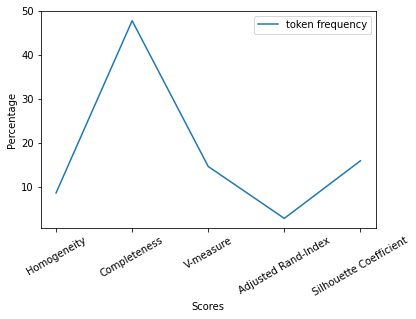

In [24]:
# visualize the 2 clusterings of token_frequency method
score_2_clusters_tf = score_clusters(score_tf_2_cluster_eval)

In [25]:
# find the 2 clusterings of tf_idf method
cluster_2_tf_idf = clustering(X,2,'tf_idf')

In [26]:
# find the evaluation of 2 clusterings of tf_idf method
score_tf_idf_2_cluster_eval = clustering_evaluation(X,cluster_2_tf_idf['gold_categories'],cluster_2_tf_idf['predicted'],method = 'tf_idf')

Homogeneity: 0.117
Completeness: 0.331
V-measure: 0.173
Adjusted Rand-Index: 0.091
Silhouette Coefficient: 0.007


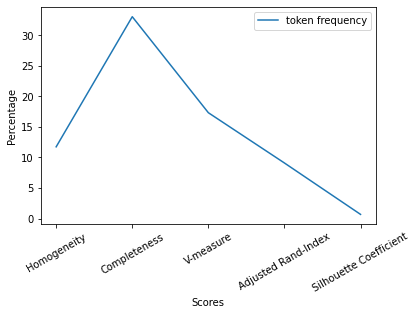

In [29]:

score_2_clusters_tf_idf = score_clusters(score_tf_idf_2_cluster_eval)

+ compare 2 clusters of tf and tf_idf methods

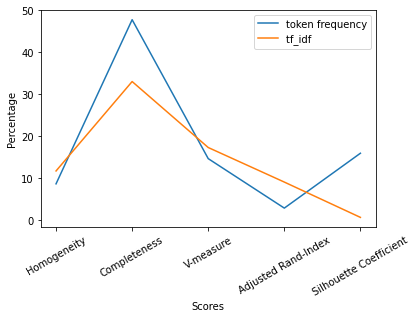

In [30]:
compare_score_2_clusters = compare_score_clusters(score_tf_2_cluster_eval,score_tf_idf_2_cluster_eval)

+ 6 clustering

In [31]:
# find the 6 clusterings of token_frequency method
cluster_6_tf = clustering(X,6,'token_frequency')

In [32]:
# find evaluation of 6 clusterings of token_frequency method
score_tf_6_cluster_eval = clustering_evaluation(X,cluster_6_tf['gold_categories'],cluster_6_tf['predicted'],method = 'token_frequency')

Homogeneity: 0.066
Completeness: 0.335
V-measure: 0.110
Adjusted Rand-Index: 0.007
Silhouette Coefficient: 0.175


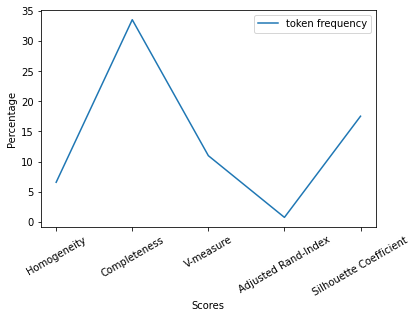

In [33]:
# visulaize the 6 clusterings of token_frequency method
score_tf_6_clusters = score_clusters(score_tf_6_cluster_eval)

In [34]:
# find the 6 clusterings of tf_idf method
cluster_6_tf_idf = clustering(X,6,'tf_idf')

In [35]:
# find the evaluation of 6 clusterings of tf_idf method
score_tf_idf_6_cluster_eval = clustering_evaluation(X,cluster_6_tf_idf['gold_categories'],cluster_6_tf_idf['predicted'],method = 'tf_idf')

Homogeneity: 0.378
Completeness: 0.412
V-measure: 0.394
Adjusted Rand-Index: 0.282
Silhouette Coefficient: 0.013


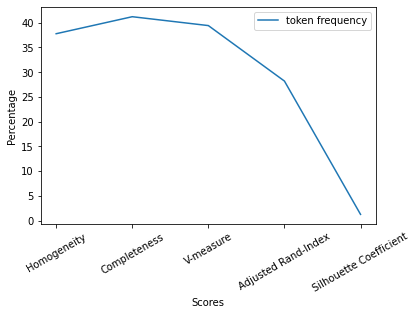

In [36]:
# visualize the 6 clusterings of tf_idf method
score_6_cluster_tf = score_clusters(score_tf_idf_6_cluster_eval)

++ Compare tf vs tf-idf of 6 clusterings

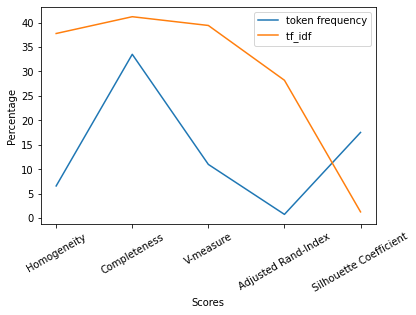

In [37]:
compare_score_6_clusters = compare_score_clusters(score_tf_6_cluster_eval,score_tf_idf_6_cluster_eval)



# Exercise 4 – Classifying (4 points)

Since you know which category and subcategory each person in your dataset belongs to, you can also learn a classifier and check how well
it can predict the category and subcategory a person in your dataset belongs to.

    Your code should include:

• a function which outputs accuracy, a confusion matrix, precision, recall and F1 for the results of your classification (when classifying into categories and when classifying into subcategories)

• a function which outputs a visualisation of the accuracy of your classifier per category and per subcategories

In [38]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

+ 2 Types (A&Z)

In [39]:
def classifier(X,Y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

    tfidf_vectorizer = TfidfVectorizer(max_features=8000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
    tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_matrix_test = tfidf_vectorizer.transform(X_test)

    # Create a Perceptron object
    clf = Perceptron()

    # Train the model on the training data
    clf.fit(tfidf_matrix_train,Y_train)

    # Test the model on the test data
    prediction = clf.predict(tfidf_matrix_test)
    # Print out the expected values and the predictions
    accuracy = accuracy_score(Y_test,prediction)
    # Print out the expected values and the predictions
    print("expected values: {},predictions:{}".format(list(Y_test),list(prediction)))

    # Print accuracy
    print("accuracy:{}".format(accuracy))
    print(classification_report(Y_test,prediction))
    return (accuracy)



In [40]:

#     Y = new_df['gold_categories']   
# 1 or 0
classes_2 = classifier(X,new_df['gold_type'])

expected values: [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1],predictions:[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
accuracy:0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.90      0.95      0.93        20

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



+ 6 categories

In [41]:
#     Y = new_df['gold_categories']   
# 1,...,5
classes_6 = classifier(X,new_df['gold_categories'])

expected values: [2, 2, 4, 3, 1, 1, 2, 1, 2, 5, 1, 1, 5, 4, 3, 0, 3, 3, 0, 3, 2, 0, 1, 3, 0, 5, 5, 5, 2, 0, 1, 0, 5, 4, 5, 3],predictions:[2, 5, 4, 3, 1, 1, 2, 1, 2, 5, 1, 1, 5, 4, 3, 0, 5, 3, 0, 3, 2, 0, 1, 1, 0, 5, 5, 5, 2, 0, 1, 0, 1, 4, 5, 3]
accuracy:0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.78      1.00      0.88         7
           2       1.00      0.83      0.91         6
           3       1.00      0.71      0.83         7
           4       1.00      1.00      1.00         3
           5       0.75      0.86      0.80         7

    accuracy                           0.89        36
   macro avg       0.92      0.90      0.90        36
weighted avg       0.91      0.89      0.89        36



+ Accuracy Visualisation Function

In [42]:
def visual_2_vs_6(acc1,acc2):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = ['Categories(2)', 'Sub Categories(6)']
    y = [acc1,acc2]
    ax.bar(x,y,width = 0.2)
    plt.show()
    

++ Compare the accuray of Categories(2) and Sub Categories(6)

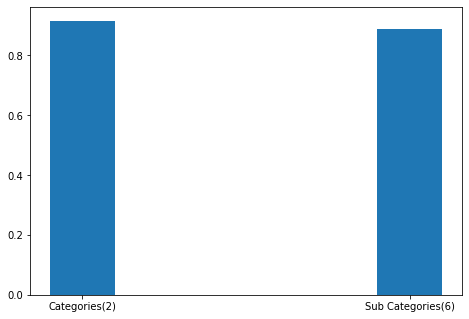

In [43]:
visual_2_vs_6(classes_2,classes_6)